In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [39]:
df=pd.read_csv('https://www.ishelp.info/data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

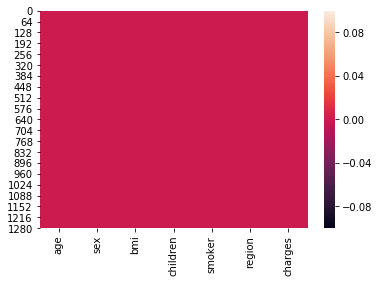

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

# Univariate Analysis 

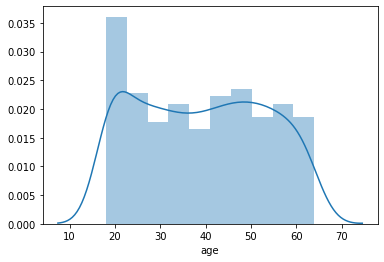

In [8]:
sns.distplot(df['age'],kde=True,bins=10)

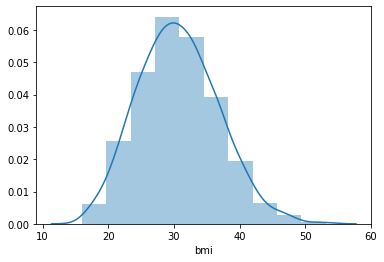

In [9]:
sns.distplot(df['bmi'],kde=True,bins=10)

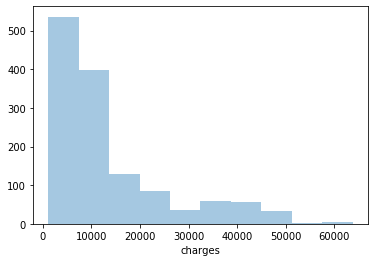

In [10]:
sns.distplot(df['charges'],kde=False,bins=10)

# Multivariate Analysis 

In [11]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


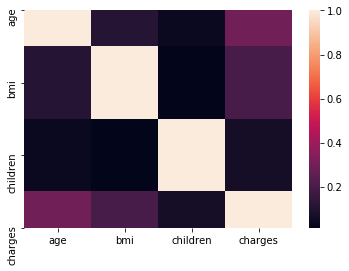

In [12]:
sns.heatmap(df.corr())

It seems that there are positive relationship between age & charges of upto 29 % and in between BMI & charges of upto 19%.

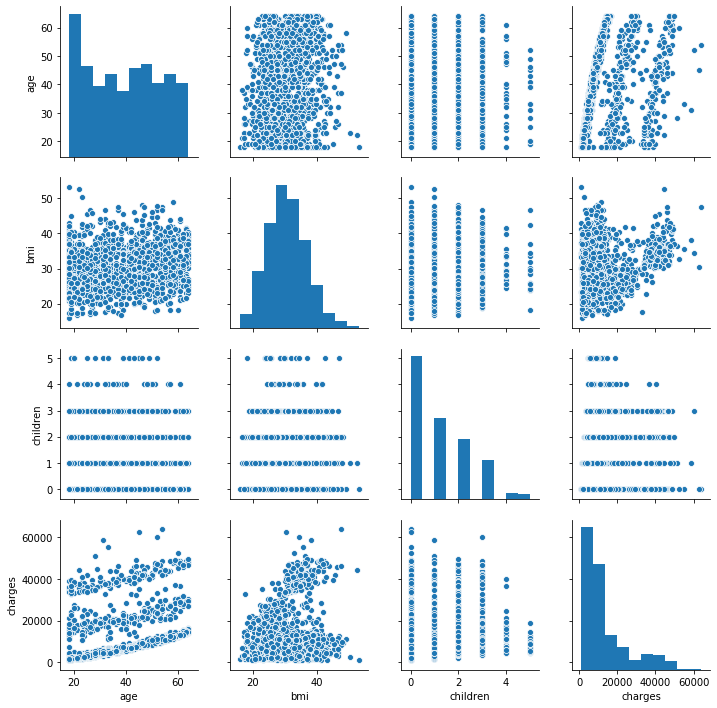

In [13]:
sns.pairplot(data=df)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


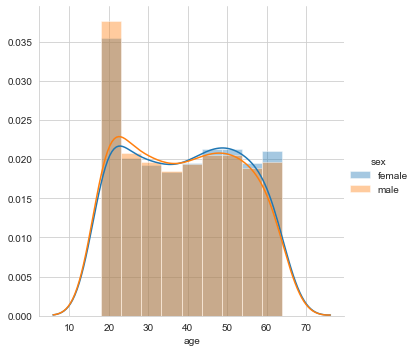

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='sex',size=5).map(sns.distplot,'age',kde=True).add_legend()

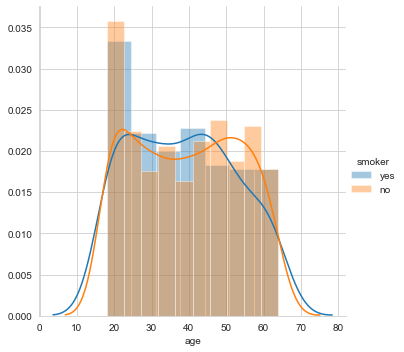

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='smoker',size=5).map(sns.distplot,'age',kde=True).add_legend()

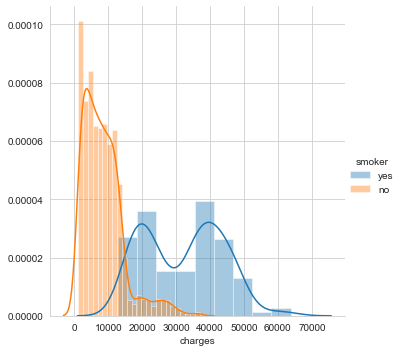

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='smoker',size=5).map(sns.distplot,'charges',kde=True).add_legend()

## We would try to find those records where charges is in between 10,000 to 20,000 even a person is smoker. 

In [17]:
ss=df.loc[(df['charges']<30000) & (df['smoker']=='yes') ]
ss

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
52,48,male,28.000,1,yes,southwest,23568.27200
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1306,29,female,21.850,0,yes,northeast,16115.30450
1307,32,male,28.120,4,yes,northwest,21472.47880
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305


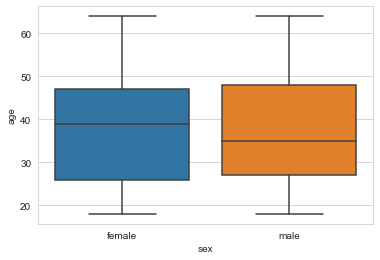

In [18]:
sns.boxplot(x='sex',y='age',data=ss)

In [19]:
ss.groupby('sex').mean()['children']

sex
female    1.000000
male      1.196721
Name: children, dtype: float64

In [20]:
ss2=df.loc[df['smoker']=='no' ]
ss2

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [21]:
ss2.groupby('sex').mean()['children']

sex
female    1.087751
male      1.092843
Name: children, dtype: float64

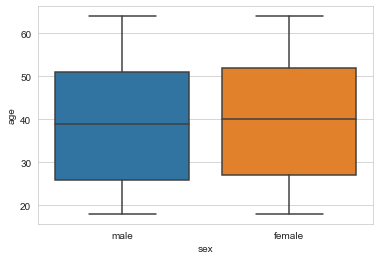

In [22]:
sns.boxplot(x='sex',y='age',data=ss2)

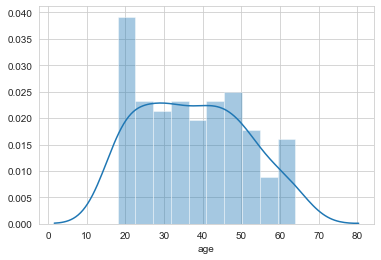

In [23]:
sns.distplot(ss['age'],kde=True,bins=10)

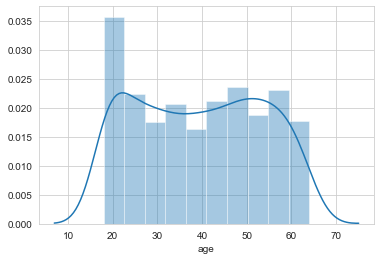

In [24]:
sns.distplot(ss2['age'],kde=True,bins=10)

# Bivariate Analysis 

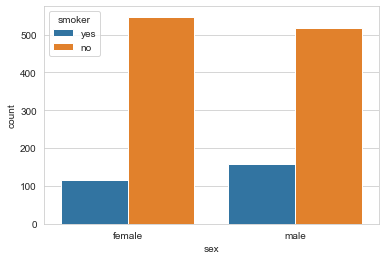

In [25]:
sns.countplot(x='sex',data=df,hue='smoker')

It means that smoker counts in each category (male & female) is less as compare to non-smoker.

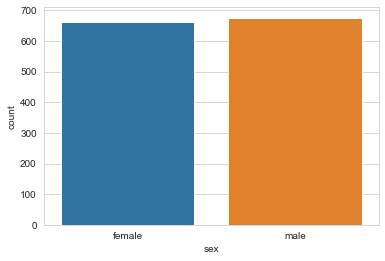

In [26]:
sns.countplot(x='sex',data=df)

It means that Male category counts are greater than female category.

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


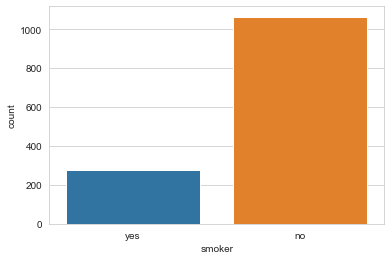

In [28]:
sns.countplot(x='smoker',data=df)

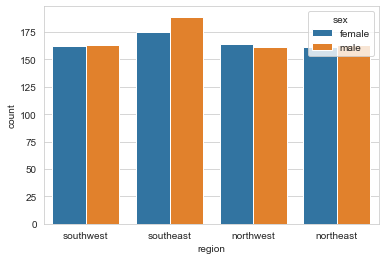

In [29]:
sns.countplot(x='region',data=df,hue='sex')

There is almost same sex ratio in each region except southeast, where it tends to higher as compare to other region.

In [30]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


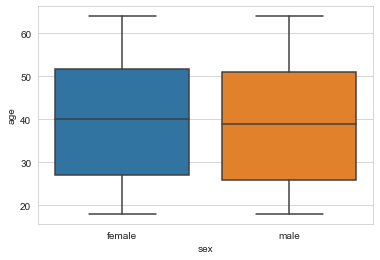

In [31]:
sns.boxplot(x='sex',y='age',data=df,)

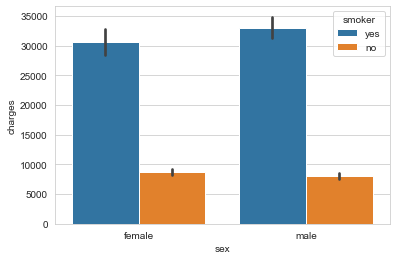

In [32]:
sns.barplot(x='sex',y='charges',data=df,hue='smoker')

In [43]:
df.groupby('sex').sum()['charges']

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

It means that charges tend to high if a person (male or female) is a smoker.

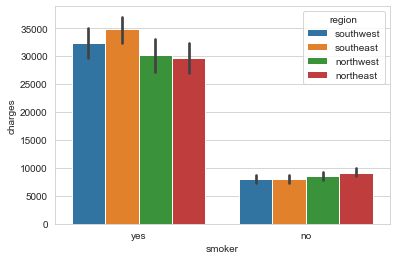

In [33]:
sns.barplot(x='smoker',y='charges',data=df,hue='region')

In [42]:
df.groupby('smoker').sum()['charges']

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

It means that if a person is smoker charges tends to be higher. And charge would be maximum if a person is smoker or from Southeast region.

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
sex= pd.get_dummies(df['sex'])
smoker = pd.get_dummies(df['smoker'])
region = pd.get_dummies(df['region'],drop_first=True)

In [36]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [37]:
df = pd.concat([df,sex,smoker,region],axis=1)
df

,age,bmi,children,charges,female,male,no,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,1
